In [1]:
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
act_train = pd.read_csv('act_train.csv')
act_test = pd.read_csv('act_test.csv')
people = pd.read_csv('people.csv')

In [3]:
from sklearn.externals import joblib

# Data research

## action data

Firstly let's review actions data.

In [3]:
act_train.sample(20)

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
1791377,ppl_390527,act2_3157820,2023-02-28,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
1569065,ppl_361511,act2_3916153,2023-03-02,type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 2,0
1553412,ppl_358874,act2_2887357,2023-05-30,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
1732743,ppl_380172,act2_1164644,2023-03-28,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
386254,ppl_161192,act2_3274917,2023-07-13,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
1815038,ppl_394738,act2_3432899,2022-09-16,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1550,0
1142918,ppl_294918,act2_1105978,2022-10-18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 23,0
682552,ppl_214777,act2_4095859,2023-08-25,type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 61,1
594442,ppl_198814,act2_4445005,2022-12-30,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,1
1709609,ppl_375905,act2_3316368,2023-06-21,type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 52,0


In [3]:
print(act_train.isnull().sum(axis = 0))
print()
print(act_train.notnull().sum(axis = 0))

people_id                  0
activity_id                0
date                       0
activity_category          0
char_1               2039676
char_2               2039676
char_3               2039676
char_4               2039676
char_5               2039676
char_6               2039676
char_7               2039676
char_8               2039676
char_9               2039676
char_10               157615
outcome                    0
dtype: int64

people_id            2197291
activity_id          2197291
date                 2197291
activity_category    2197291
char_1                157615
char_2                157615
char_3                157615
char_4                157615
char_5                157615
char_6                157615
char_7                157615
char_8                157615
char_9                157615
char_10              2039676
outcome              2197291
dtype: int64


We can see that there is the same amount of missing data in coumns (char_1, ... , char_9) as existing data in (char_10)

In [4]:
np.sum(act_train.char_1.notnull()^act_train.char_10.notnull())

2197291

In [5]:
print(act_train[act_train.char_1.notnull()].activity_id.values)
print()
print(act_train[act_train.char_1.isnull()].activity_id.values)

['act1_9923' 'act1_198174' 'act1_214090' ..., 'act1_245264' 'act1_9232'
 'act1_330864']

['act2_1734928' 'act2_2434093' 'act2_3404049' ..., 'act2_536973'
 'act2_688656' 'act2_715089']


In [6]:
print(act_train[act_train.char_1.notnull()].outcome.mean())
print()
print(act_train[act_train.char_1.isnull()].outcome.mean())

0.41132506423880977

0.4464758128251742


* **char_1 XOR char_10 == 1**
* if **char_1** exists activity_id == (act1_*)
* if **char_10** exists activity_id == (act2_*)

Here is more concrete information about activity types:

In [7]:
print(np.unique(act_train[act_train.char_1.isnull()].activity_category, return_counts = True))
print()
print(np.unique(act_train[act_train.char_1.notnull()].activity_category, return_counts = True))

(array(['type 2', 'type 3', 'type 4', 'type 5', 'type 6', 'type 7'], dtype=object), array([904683, 429408, 207465, 490710,   4253,   3157], dtype=int64))

(array(['type 1'], dtype=object), array([157615], dtype=int64))


Count unique values for columns:

In [8]:
for i in range(1,11):
    lst = np.unique(act_train[act_train["char_"+str(i)].notnull()]["char_"+str(i)])
    print("char_{}: number of unique values = {}".format(i,len(lst)))

char_1: number of unique values = 51
char_2: number of unique values = 32
char_3: number of unique values = 11
char_4: number of unique values = 7
char_5: number of unique values = 7
char_6: number of unique values = 5
char_7: number of unique values = 8
char_8: number of unique values = 18
char_9: number of unique values = 19
char_10: number of unique values = 6515


## People

In [9]:
people.shape

(189118, 41)

In [10]:
people.sample(5)

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
2840,ppl_105362,type 2,group 17304,type 2,2023-04-21,type 40,type 25,type 9,type 3,type 8,...,False,False,False,False,False,False,False,False,False,25
92432,ppl_275201,type 2,group 17304,type 2,2023-02-02,type 40,type 25,type 9,type 4,type 24,...,False,True,True,True,True,True,True,True,True,46
125141,ppl_337259,type 2,group 36632,type 3,2022-12-07,type 40,type 25,type 9,type 3,type 11,...,True,True,True,True,True,True,False,True,True,94
175506,ppl_74001,type 2,group 17304,type 2,2022-11-08,type 40,type 25,type 9,type 4,type 13,...,False,False,False,False,False,False,False,False,False,0
60540,ppl_21455,type 2,group 17304,type 2,2023-02-28,type 40,type 25,type 9,type 4,type 13,...,False,False,False,False,False,False,False,False,False,38


In [11]:
print(people.columns[people.isnull().sum(axis = 0) != 0])

Index([], dtype='object')


No missing data exists

In [12]:
people.dtypes

people_id    object
char_1       object
group_1      object
char_2       object
date         object
char_3       object
char_4       object
char_5       object
char_6       object
char_7       object
char_8       object
char_9       object
char_10        bool
char_11        bool
char_12        bool
char_13        bool
char_14        bool
char_15        bool
char_16        bool
char_17        bool
char_18        bool
char_19        bool
char_20        bool
char_21        bool
char_22        bool
char_23        bool
char_24        bool
char_25        bool
char_26        bool
char_27        bool
char_28        bool
char_29        bool
char_30        bool
char_31        bool
char_32        bool
char_33        bool
char_34        bool
char_35        bool
char_36        bool
char_37        bool
char_38       int64
dtype: object

In [13]:
cat = ["char_1", "char_2", "char_3", "char_4", "char_5", "char_6", "char_7", "char_8", "char_9", "group_1"]
for i in cat:
    print("{}: number of unique values = {}".format(i,len(np.unique(people[i]))))

char_1: number of unique values = 2
char_2: number of unique values = 3
char_3: number of unique values = 43
char_4: number of unique values = 25
char_5: number of unique values = 9
char_6: number of unique values = 7
char_7: number of unique values = 25
char_8: number of unique values = 8
char_9: number of unique values = 9
group_1: number of unique values = 34224


# Some weird visualisation

## activity

In [14]:
# split data by activity types
cols_1 = ["activity_category", "char_1", "char_2", "char_3", "char_4", "char_5", "char_6", "char_7", "char_8", "char_9"]
cols_2 = ["activity_category", "char_10"]

data_1 = act_train[cols_1 + ["outcome"]].dropna()
data_2 = act_train[cols_2 + ["outcome"]].dropna()

In [16]:
for col in data_1.columns[:-1]:
    data_1[col] = data_1[col].apply(lambda x: x.split(' ')[1])
    data_1[col] = pd.to_numeric(data_1[col]).astype(int)
    
for col in data_2.columns[:-1]:
    data_2[col] = data_2[col].apply(lambda x: x.split(' ')[1])
    data_2[col] = pd.to_numeric(data_2[col]).astype(int)

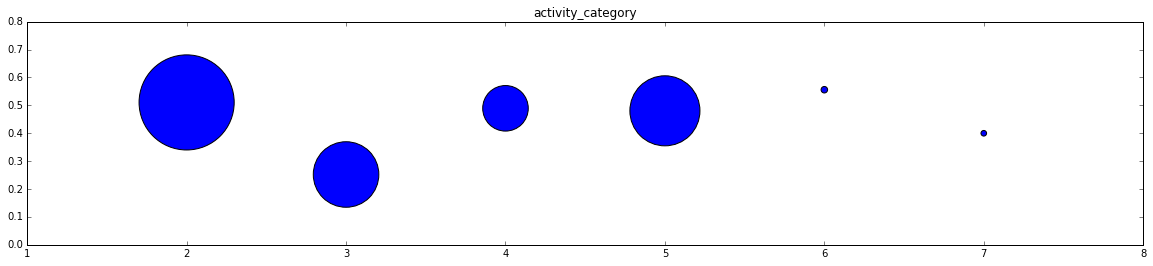

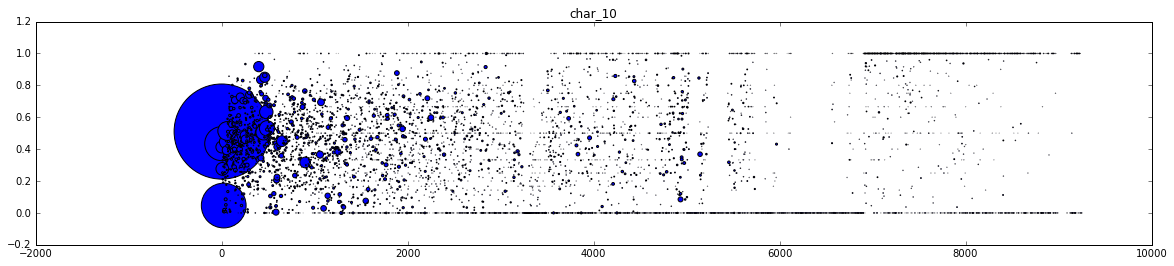

In [66]:
for i in data_2.columns[:-1]:
    lst, count = np.unique(data_2[i], return_counts = True)
    scores = [data_2[data_2[i] == l]["outcome"].mean() for l in lst]
    pylab.figure(figsize = [20,4])
    pylab.scatter(lst, scores, s = count/100)
    pylab.title(i)

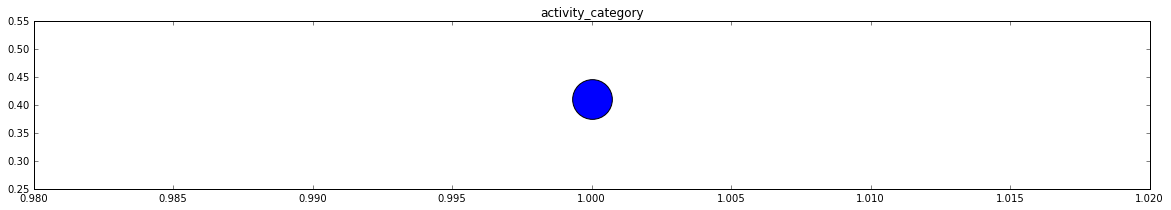

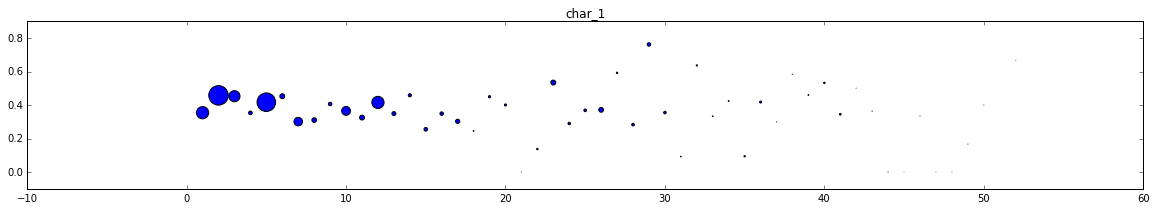

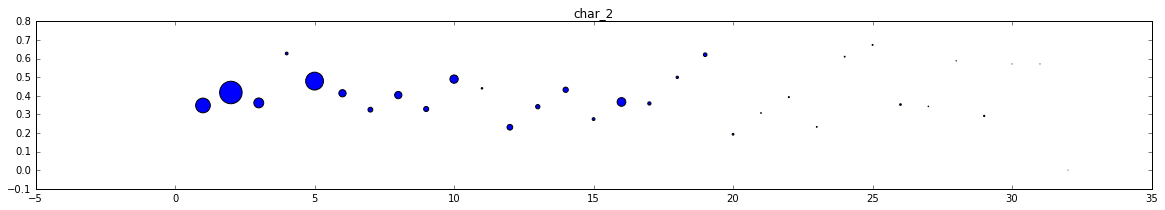

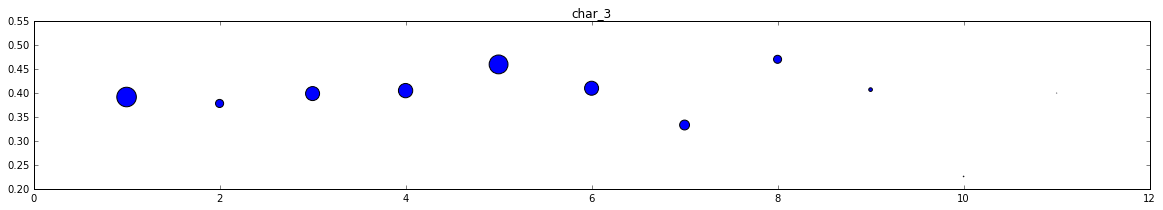

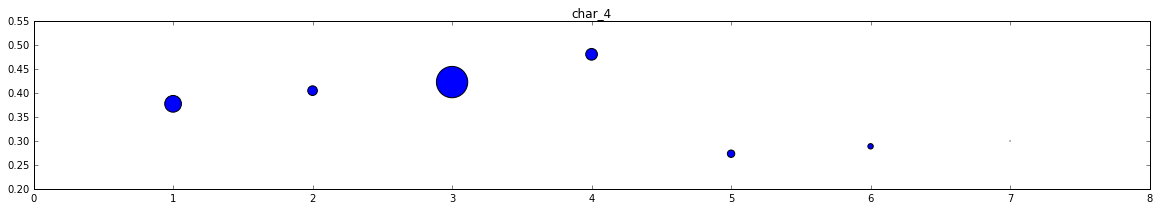

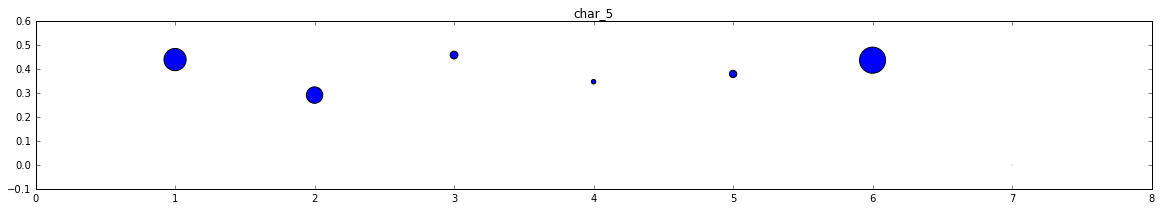

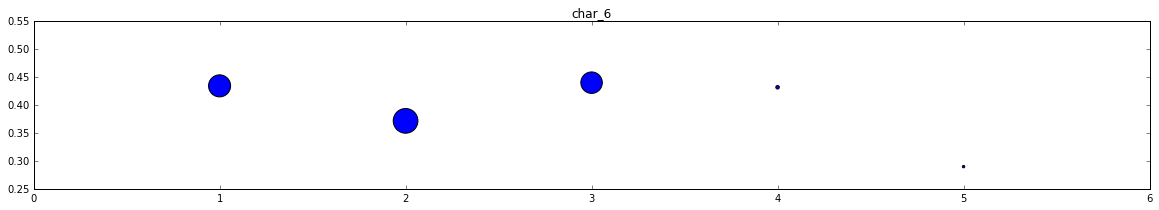

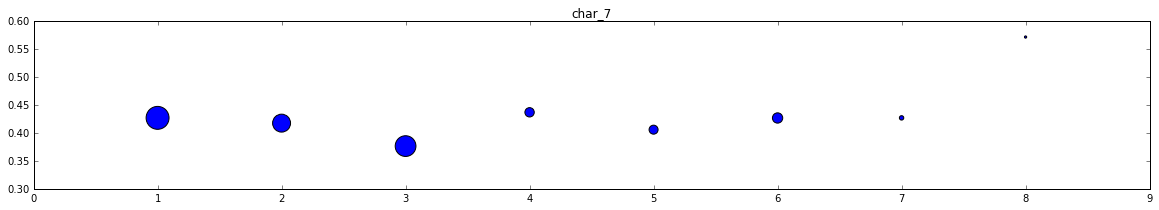

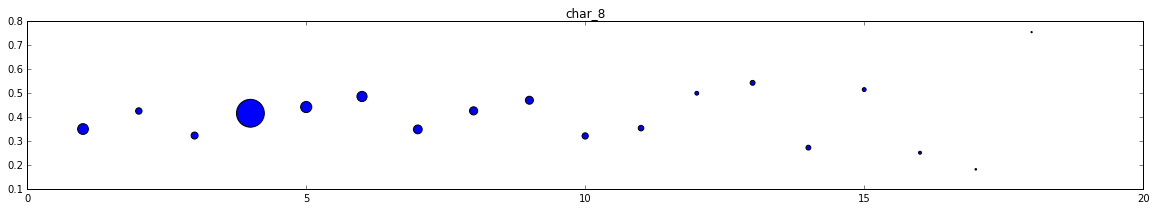

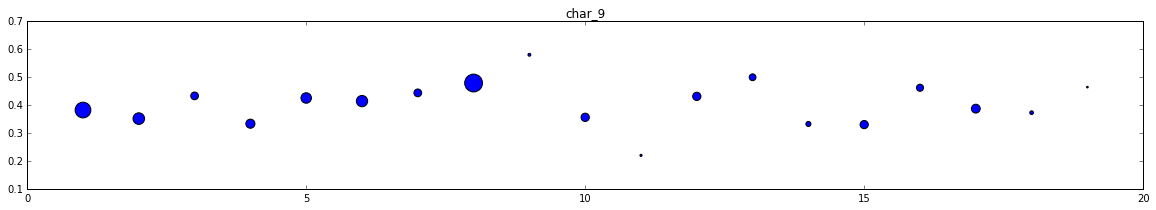

In [67]:
for i in data_1.columns[:-1]:
    lst, count = np.unique(data_1[i], return_counts = True)
    scores = [data_1[data_1[i] == l]["outcome"].mean() for l in lst]
    pylab.figure(figsize = [20,3])
    pylab.scatter(lst, scores, s = count/100)
    pylab.title(i)

## people

In [3]:
#merging tables
data_full = act_train[["people_id", "outcome"]].merge(people, how='left', on='people_id')

for col in data_full.columns[2:5]:
    data_full[col] = data_full[col].apply(lambda x: x.split(' ')[1])
    data_full[col] = pd.to_numeric(data_full[col]).astype(int)
for col in data_full.columns[6:13]:
    data_full[col] = data_full[col].apply(lambda x: x.split(' ')[1])
    data_full[col] = pd.to_numeric(data_full[col]).astype(int)

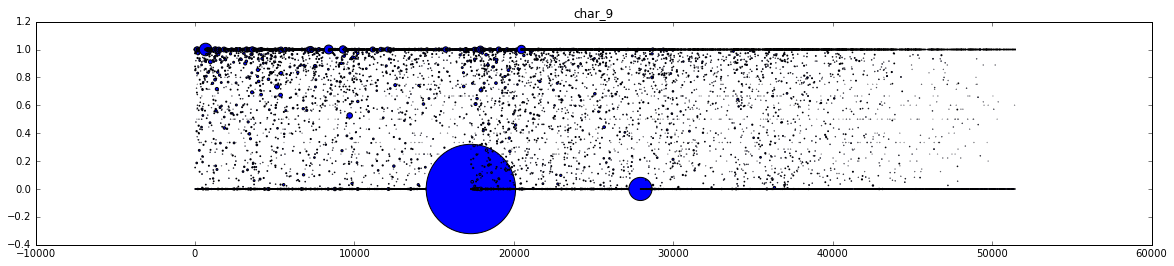

In [101]:
lst, count = np.unique(data_full["group_1"], return_counts = True)
scores = [data_full[data_full["group_1"] == l]["outcome"].mean() for l in lst]
pylab.figure(figsize = [20,4])
pylab.scatter(lst, scores, s = count/100)
pylab.title(i)

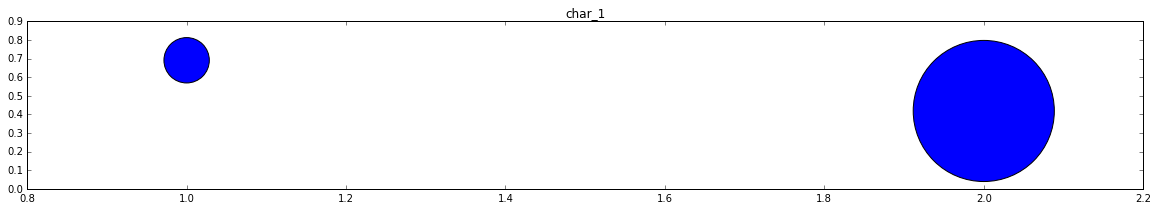

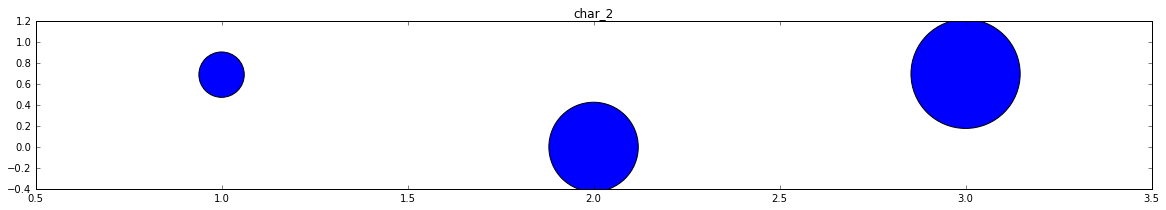

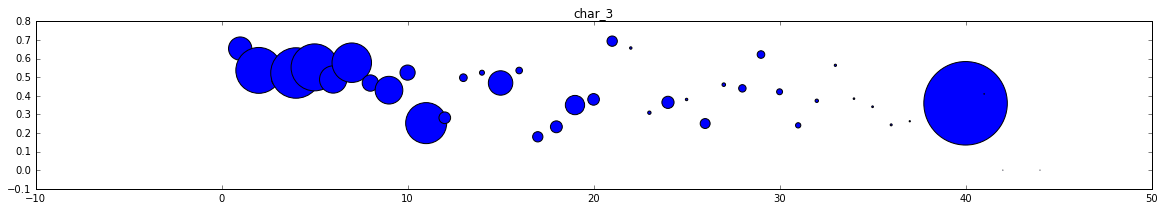

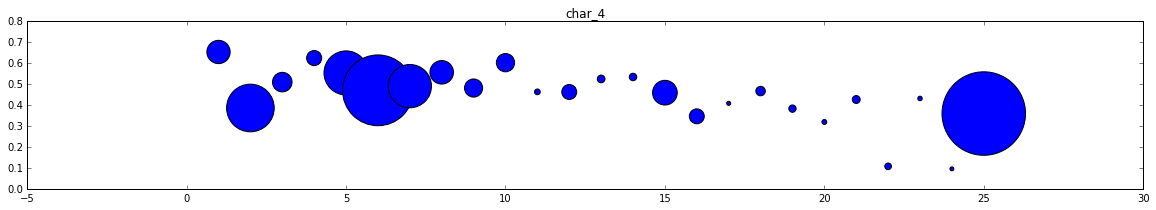

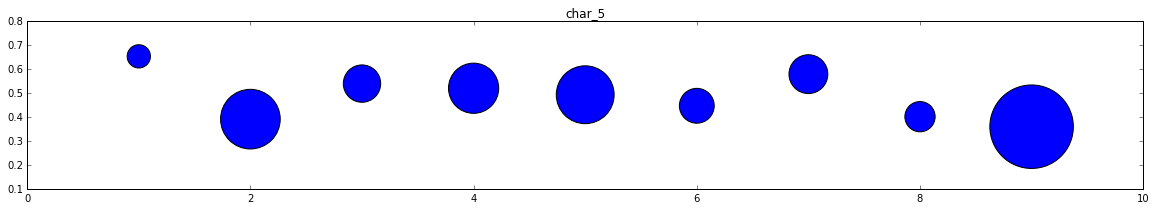

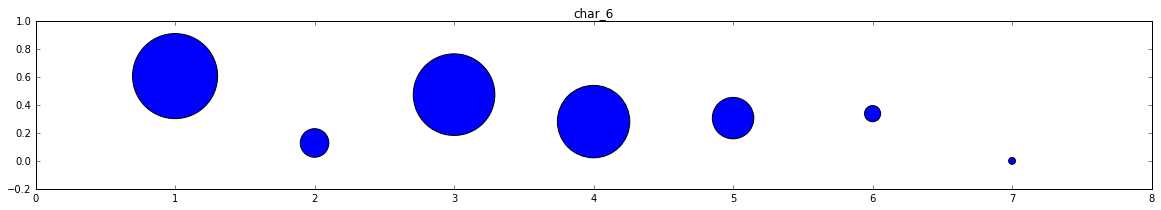

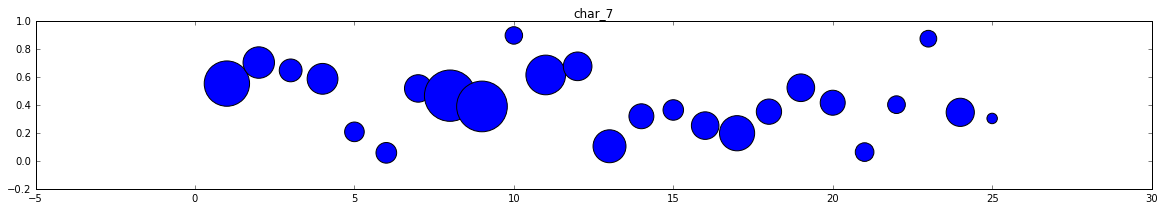

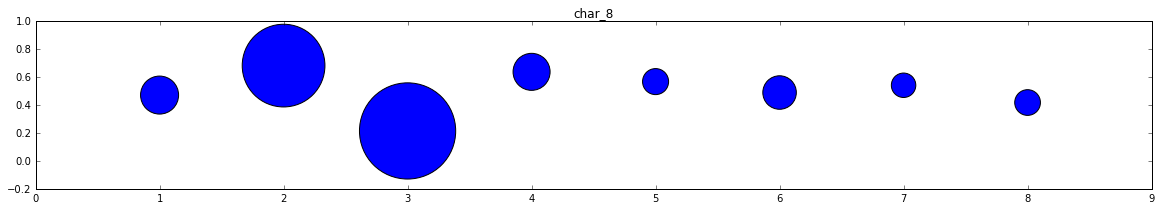

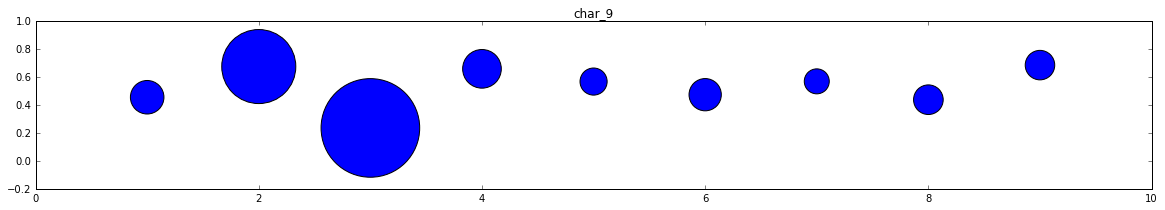

In [103]:
for i in ["char_"+str(i+1) for i in range(9)]:
    lst, count = np.unique(data_full[i], return_counts = True)
    scores = [data_full[data_full[i] == l]["outcome"].mean() for l in lst]
    pylab.figure(figsize = [20,3])
    pylab.scatter(lst, scores, s = count/100)
    pylab.title(i)

### The only numeric feature

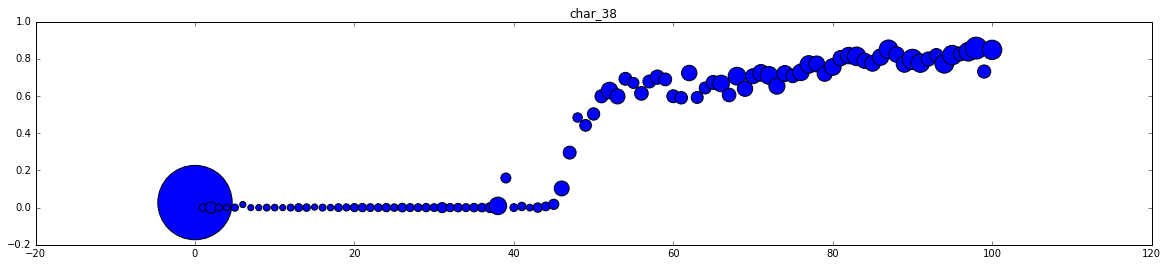

In [8]:
lst, count = np.unique(data_full["char_38"], return_counts = True)
scores = [data_full[data_full["char_38"] == l]["outcome"].mean() for l in lst]
pylab.figure(figsize = [20,4])
pylab.scatter(lst, scores, s = count/100)
pylab.title("char_38")

### boolean features

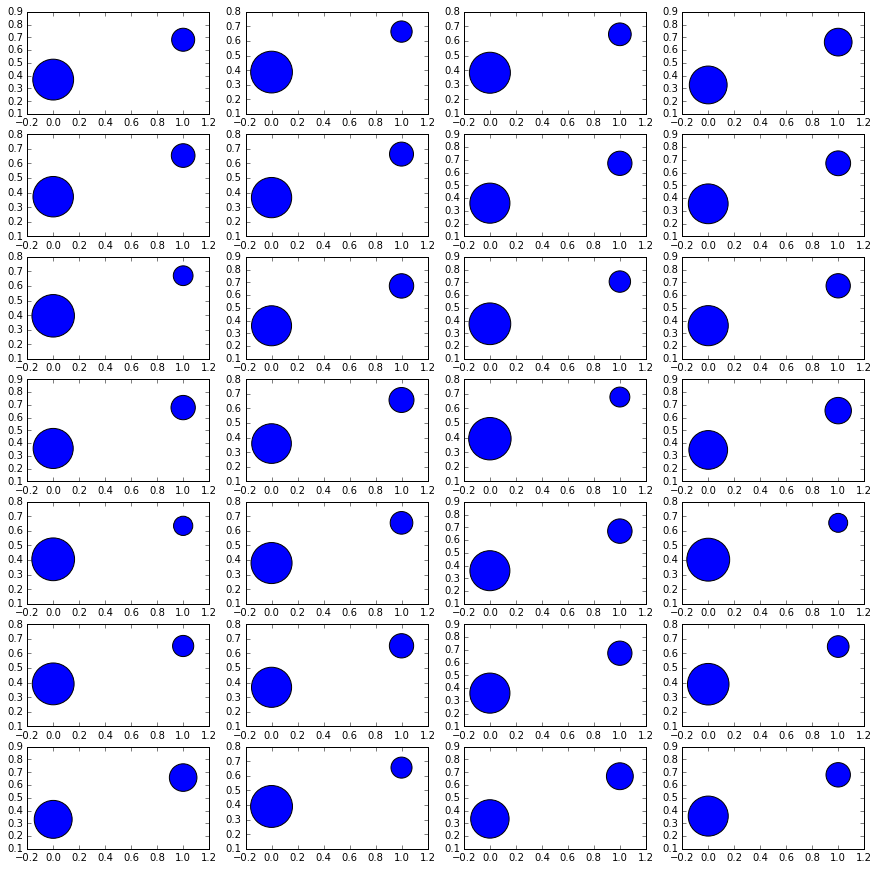

In [16]:
f, axarr = pylab.subplots(7,4, figsize = [15,15])
for i in range(28):
    lst, count = np.unique(data_full["char_"+str(i+10)], return_counts = True)
    scores = [data_full[data_full["char_"+str(i+10)] == l]["outcome"].mean() for l in lst]
    axarr[i//4,i%4].scatter(lst, scores, s = count/1000)
    #axarr[i//4,i%4].title("char_"+str(i+10))

# Preprocessing

In [115]:
data_full = act_train.merge(people, how='left', on='people_id').drop(["date_x", "date_y", "people_id", "group_1", "char_2_y", "char_38"], axis = 1)

In [116]:
data_1 = data_full[data_full.activity_category == "type 1"].drop("char_10_x", axis = 1)
data_2 = data_full[data_full.activity_category != "type 1"].drop(["char_{}_x".format(i+1) for i in range(9)], axis = 1)

In [117]:
y_1 = data_1["outcome"]
y_2 = data_2["outcome"]

a_1 = data_1["activity_id"]
a_2 = data_2["activity_id"]

data_1 = data_1.drop(["outcome", "activity_id"], axis = 1)
data_2 = data_2.drop(["outcome", "activity_id"], axis = 1)

In [20]:
list(enumerate(data_2.columns))

[(0, 'activity_category'),
 (1, 'char_10_x'),
 (2, 'char_1_y'),
 (3, 'char_3_y'),
 (4, 'char_4_y'),
 (5, 'char_5_y'),
 (6, 'char_6_y'),
 (7, 'char_7_y'),
 (8, 'char_8_y'),
 (9, 'char_9_y'),
 (10, 'char_10_y'),
 (11, 'char_11'),
 (12, 'char_12'),
 (13, 'char_13'),
 (14, 'char_14'),
 (15, 'char_15'),
 (16, 'char_16'),
 (17, 'char_17'),
 (18, 'char_18'),
 (19, 'char_19'),
 (20, 'char_20'),
 (21, 'char_21'),
 (22, 'char_22'),
 (23, 'char_23'),
 (24, 'char_24'),
 (25, 'char_25'),
 (26, 'char_26'),
 (27, 'char_27'),
 (28, 'char_28'),
 (29, 'char_29'),
 (30, 'char_30'),
 (31, 'char_31'),
 (32, 'char_32'),
 (33, 'char_33'),
 (34, 'char_34'),
 (35, 'char_35'),
 (36, 'char_36'),
 (37, 'char_37')]

In [119]:
for col in data_1.columns[:18]:
    data_1[col] = data_1[col].apply(lambda x: x.split(' ')[1])
    data_1[col] = pd.to_numeric(data_1[col]).astype(int)
    
for col in data_2.columns[:10]:
    data_2[col] = data_2[col].apply(lambda x: x.split(' ')[1])
    data_2[col] = pd.to_numeric(data_2[col]).astype(int)

## XGBoost

In [22]:
from sklearn.cross_validation import cross_val_score
import xgboost as xgb

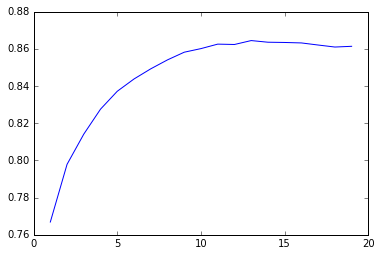

In [23]:
t = np.arange(1,20,1)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=0.2, max_depth=i, n_estimators=10, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, data_1, y_1, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

In [24]:
np.argmax(scores)

12

In [25]:
estimator = xgb.XGBClassifier(learning_rate=0.2, max_depth=13, n_estimators=10, min_child_weight=3)
np.mean(cross_val_score(estimator, data_1, y_1, scoring = 'roc_auc', cv = 5))

0.86442581754810366

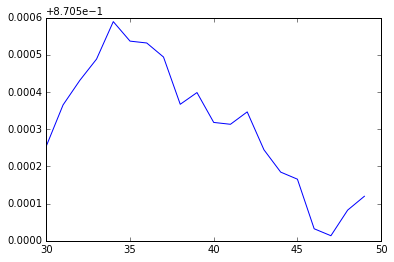

In [28]:
t = np.arange(30,50,1)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=0.2, max_depth=13, n_estimators=i, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, data_1, y_1, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

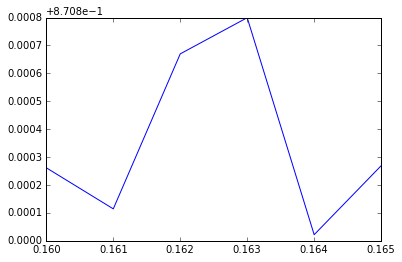

In [33]:
t = np.arange(0.16,0.165,0.001)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=i, max_depth=13, n_estimators=34, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, data_1, y_1, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

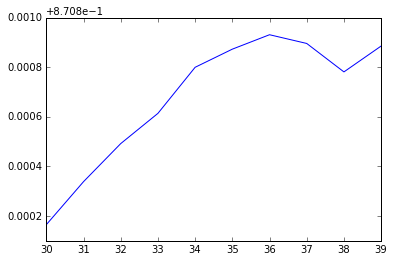

In [34]:
t = np.arange(30,40,1)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=0.163, max_depth=13, n_estimators=i, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, data_1, y_1, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

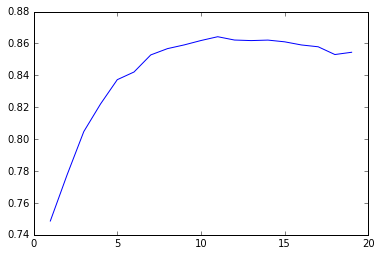

In [35]:
t = np.arange(1,20,1)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=0.2, max_depth=i, n_estimators=10, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, data_2, y_2, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

In [36]:
np.argmax(scores)

10

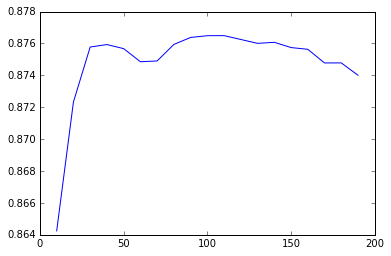

In [37]:
t = np.arange(10,200,10)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=0.2, max_depth=11, n_estimators=i, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, data_2, y_2, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

Wall time: 16min 28s


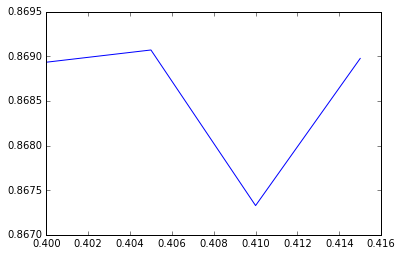

In [44]:
%%time
t = np.arange(0.4,0.42,0.005)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=i, max_depth=11, n_estimators=10, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, data_2, y_2, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

In [46]:
%%time
est_2 = xgb.XGBClassifier(learning_rate=0.4, max_depth=11, n_estimators=108, min_child_weight=3)
est_2.fit(data_2,y_2)

Wall time: 8min 19s


In [47]:
joblib.dump(est_2, 'XGB_on_data_2.pkl') 

['XGB_on_data_2.pkl', 'XGB_on_data_2.pkl_01.npy', 'XGB_on_data_2.pkl_02.npy']

In [48]:
%%time
est_1 = xgb.XGBClassifier(learning_rate=0.163, max_depth=13, n_estimators=36, min_child_weight=3)
est_1.fit(data_1,y_1)

Wall time: 22.9 s


In [49]:
joblib.dump(est_1, 'XGB_on_data_1.pkl')

['XGB_on_data_1.pkl', 'XGB_on_data_1.pkl_01.npy', 'XGB_on_data_1.pkl_02.npy']

In [120]:
pr_1 = est_1.predict_proba(data_1)[:,1]
pr_2 = est_2.predict_proba(data_2)[:,1]

In [121]:
pred = np.hstack([pr_1,pr_2])
test_ids = np.hstack([a_1,a_2])
output = pd.DataFrame({ 'activity_id' : test_ids, 'outcome': pred })
output.to_csv('XGB_on_data_1-2_train.csv', index = False)

## Group 1 trick

In [109]:
#merging tables
data_full = act_train[["people_id", "outcome", "activity_id"]].merge(people[["people_id", "group_1"]], how='left', on='people_id')

data_full["group_1"] = data_full["group_1"].apply(lambda x: x.split(' ')[1])
data_full["group_1"] = pd.to_numeric(data_full["group_1"]).astype(int)

In [110]:
lst = np.unique(data_full["group_1"]).tolist()
scores = [data_full[data_full["group_1"] == l]["outcome"].mean() for l in lst]
data_full["group_1"] = data_full["group_1"].apply(lambda x: lst.index(x))

In [111]:
from sklearn.metrics import roc_auc_score
scores = np.array(scores)

In [112]:
roc_auc_score(data_full["outcome"], scores[data_full["group_1"]])

0.99727237339696373

In [113]:
out = pd.DataFrame({"activity_id": data_full["activity_id"], "outcome": scores[data_full["group_1"]]})
out.to_csv("g1_hack_train.csv", index = False)

## XGBoost on char_2 and group_1

In [102]:
#merging tables
data_full = act_train[["people_id", "outcome", "activity_id"]].merge(people[["people_id", "group_1", "char_2"]], how='left', on='people_id')

data_full["char_2"] = data_full["char_2"].apply(lambda x: x.split(' ')[1])
data_full["char_2"] = pd.to_numeric(data_full["char_2"]).astype(int)

data_full["group_1"] = data_full["group_1"].apply(lambda x: x.split(' ')[1])
data_full["group_1"] = pd.to_numeric(data_full["group_1"]).astype(int)

In [103]:
X = data_full[["group_1", "char_2"]]
y = data_full["outcome"]

Wall time: 49min 56s


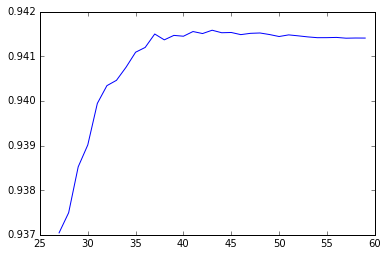

In [69]:
%%time
t = np.arange(27,60,1)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=i, n_estimators=10, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, X, y, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

In [70]:
t[np.argmax(np.array(scores))]

43

Wall time: 5h 30min 23s


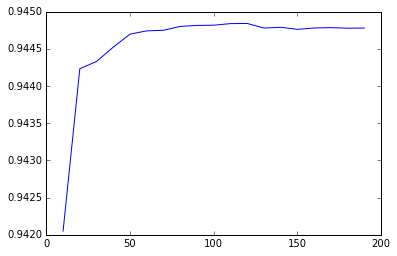

In [71]:
%%time
t = np.arange(10,200,10)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=0.2, max_depth=43, n_estimators=i, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, X, y, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

Wall time: 10min 5s


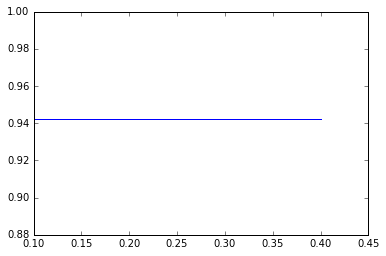

In [72]:
%%time
t = np.arange(0.1,0.4,0.05)
scores = []
for i in t:
    estimator = xgb.XGBClassifier(learning_rate=0.2, max_depth=43, n_estimators=10, min_child_weight=3)
    scores.append(np.mean(cross_val_score(estimator, X, y, scoring = 'roc_auc', cv = 5)))
pylab.plot(t,scores)

In [97]:
estimator = xgb.XGBClassifier(learning_rate=0.2, max_depth=43, n_estimators=120, min_child_weight=3)
estimator.fit(X,y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=43,
       min_child_weight=3, missing=None, n_estimators=120, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [104]:
out = pd.DataFrame({"activity_id": data_full["activity_id"], "outcome": estimator.predict_proba(X)[:,1]})
out.to_csv("g1_c2_hack_train.csv", index = False)

## RandomForestClassifier

## char_38 Trick

In [152]:
#merging tables
data_full = act_train[["people_id", "outcome", "activity_id"]].merge(people[["people_id", "char_38"]], how='left', on='people_id')

In [132]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

In [140]:
data_full.sample(5)

,people_id,outcome,activity_id,char_38
1142626,ppl_294918,0,act2_1082790,0
1464147,ppl_343347,1,act2_1776556,65
977683,ppl_265578,0,act2_4359830,0
1303779,ppl_313911,1,act2_193572,93
1196548,ppl_294918,0,act2_989338,0


In [146]:
cs = np.arange(1,100,1)
lr_cv = LogisticRegressionCV(Cs = cs, penalty = "l2", cv = 5, scoring = "roc_auc")

In [147]:
%%time
lr_cv.fit(data_full["char_38"].reshape(-1, 1) , data_full["outcome"])

Wall time: 26min 32s


LogisticRegressionCV(Cs=array([ 1,  2, ..., 98, 99]), class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='roc_auc',
           solver='lbfgs', tol=0.0001, verbose=0)

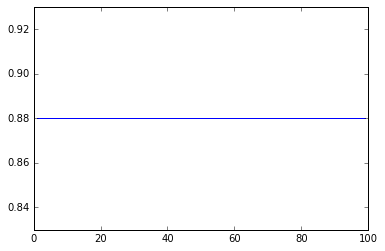

In [148]:
pylab.plot(lr_cv.Cs_,lr_cv.scores_[1].mean(axis=0))

In [149]:
roc_auc_score(data_full["outcome"], lr_cv.predict_proba(data_full["char_38"].reshape(-1, 1))[:,1])

0.87995168457019812

In [153]:
out = pd.DataFrame({"activity_id": data_full["activity_id"], "outcome": lr_cv.predict_proba(data_full["char_38"].reshape(-1, 1))[:,1]})
out.to_csv("c38_train.csv", index = False)

# TEST DATA

### Preprocessing

In [50]:
# preprocessing
data_full = act_test.merge(people, how='left', on='people_id').drop(["date_x", "date_y", "people_id", "group_1", "char_2_y", "char_38"], axis = 1)

data_1 = data_full[data_full.activity_category == "type 1"].drop(["char_10_x"], axis = 1)
data_2 = data_full[data_full.activity_category != "type 1"].drop(["char_{}_x".format(i+1) for i in range(9)], axis = 1)

act_1 = data_1["activity_id"].values
act_2 = data_2["activity_id"].values

data_1 = data_1.drop(["activity_id"], axis=1)
data_2 = data_2.drop(["activity_id"], axis=1)


In [51]:
for col in data_1.columns[:18]:
    data_1[col] = data_1[col].apply(lambda x: x.split(' ')[1])
    data_1[col] = pd.to_numeric(data_1[col]).astype(int)
    
for col in data_2.columns[:10]:
    data_2[col] = data_2[col].apply(lambda x: x.split(' ')[1])
    data_2[col] = pd.to_numeric(data_2[col]).astype(int)

### Put estimator

In [ ]:
estimator = # <- put estimator here
pred = estimator.predict_proba(test)[:,1]

### 2 tables

In [52]:
p1 = est_1.predict_proba(data_1)[:,1]
p2 = est_2.predict_proba(data_2)[:,1]
pred = np.hstack([p1,p2])
test_ids = np.hstack([act_1,act_2])

### group 1

In [58]:
data_full = act_test[["people_id", "activity_id"]].merge(people[["people_id", "group_1"]], how='left', on='people_id')

data_full["group_1"] = data_full["group_1"].apply(lambda x: x.split(' ')[1])
data_full["group_1"] = pd.to_numeric(data_full["group_1"]).astype(int)

In [59]:
counter = 0
def prob(x):
    global counter
    try:
        return lst.index(x)
    except:
        counter += 1
        return np.random.randint(len(lst))
    
data_full["group_1"] = data_full["group_1"].apply(prob)
counter/len(data_full)

0.13850972654189903

In [60]:
test_ids = data_full["activity_id"]
pred = scores[data_full["group_1"]]

### group_1 + char_2

In [99]:
data_full = act_test[["people_id", "activity_id"]].merge(people[["people_id", "group_1", "char_2"]], how='left', on='people_id')

data_full["char_2"] = data_full["char_2"].apply(lambda x: x.split(' ')[1])
data_full["char_2"] = pd.to_numeric(data_full["char_2"]).astype(int)

data_full["group_1"] = data_full["group_1"].apply(lambda x: x.split(' ')[1])
data_full["group_1"] = pd.to_numeric(data_full["group_1"]).astype(int)

X = data_full[["group_1", "char_2"]]

In [100]:
out = pd.DataFrame({"activity_id": data_full["activity_id"], "outcome": estimator.predict_proba(X)[:,1]})
out.to_csv("g1_c2_hack_test.csv", index = False)

## Char_38

In [154]:
data_full = act_test[["people_id", "activity_id"]].merge(people[["people_id", "char_38"]], how='left', on='people_id')

In [155]:
out = pd.DataFrame({"activity_id": data_full["activity_id"], "outcome": lr_cv.predict_proba(data_full["char_38"].reshape(-1, 1))[:,1]})
out.to_csv("c38_test.csv", index = False)

# DO NOT TOUCH!

In [61]:
#pred = estimator.predict_proba(test)[:,1]

output = pd.DataFrame({ 'activity_id' : test_ids, 'outcome': pred })
output.head()
output.to_csv('out2.csv', index = False)